In [ ]:
# ======= Variables =========

# Fill in the variables below and run cell first
# Note: Use forward slashes / instead of backslashes \ in file paths


CLEANED_CSV_FILE_PATH = 'C:/cal-housing-prices/dataset/housing_cleaned.csv'

DATASET_FOR_MODEL_CSV_FILE_PATH = 'C:/cal-housing-prices/dataset/dataset.csv'

OCEAN_PROXIMITY_CATEGORY_MAPPING_JSON_FILE_PATH = 'C:/cal-housing-prices/dataset/ocean_proximity_category_mapping.json'

In [2]:
# ========= Libraries =========

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the clean dataset

df = pd.read_csv(CLEANED_CSV_FILE_PATH)

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20421,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND
20422,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND
20423,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND
20424,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND


In [18]:
# Create ocean_proximity_category column in order to give numerical values to ocean_proximity

# Import the mapping from separate .json file to have single source of truth
import json

with open(OCEAN_PROXIMITY_CATEGORY_MAPPING_JSON_FILE_PATH) as f:
    OCEAN_PROXIMITY_CATEGORY_MAPPING = json.load(f)

# Apply the mapping to create a new column
df['ocean_proximity_category'] = df['ocean_proximity'].map(OCEAN_PROXIMITY_CATEGORY_MAPPING)

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20421,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND,0
20422,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND,0
20423,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND,0
20424,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND,0


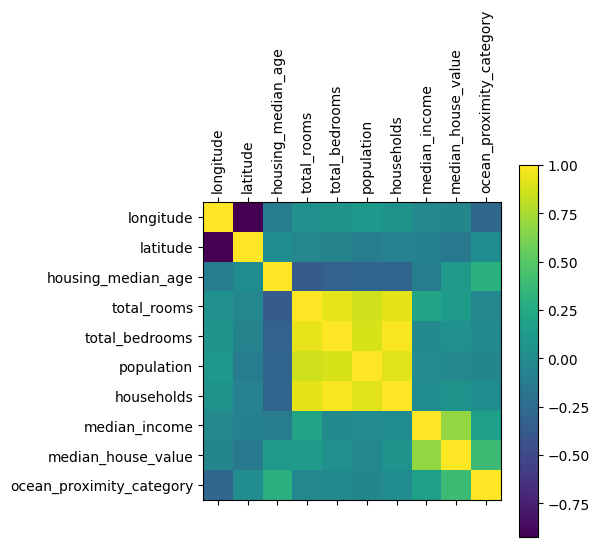

In [26]:
# Plot correlation matrix

correlation_matrix = df.drop(columns=['ocean_proximity']).corr() # exclude 'ocean_proximity' column, which is non-numeric, as well as latitude and longitude

plt.matshow(correlation_matrix)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()

plt.show()

# Note: Could also normalize the data before computing the correlation matrix, but results are intuitive for this dataset

In [27]:
# Inspect correlation matrix values

correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_category
longitude,1.000000,-0.924631,-0.109586,0.046094,0.070401,0.103951,0.057288,-0.015474,-0.045654,-0.272603
latitude,-0.924631,1.000000,0.012164,-0.036844,-0.067355,-0.112334,-0.072294,-0.079817,-0.144335,0.008466
housing_median_age,-0.109586,0.012164,1.000000,-0.361753,-0.321339,-0.303641,-0.303624,-0.118299,0.106001,0.295129
total_rooms,0.046094,-0.036844,-0.361753,1.000000,0.929357,0.864014,0.917753,0.200173,0.135326,-0.032101
total_bedrooms,0.070401,-0.067355,-0.321339,0.929357,1.000000,0.885412,0.979453,-0.006913,0.051005,-0.009843
population,0.103951,-0.112334,-0.303641,0.864014,0.885412,1.000000,0.914781,0.007234,-0.024142,-0.041064
households,0.057288,-0.072294,-0.303624,0.917753,0.979453,0.914781,1.000000,0.014432,0.066565,0.012263
median_income,-0.015474,-0.079817,-0.118299,0.200173,-0.006913,0.007234,0.014432,1.000000,0.688832,0.164734
median_house_value,-0.045654,-0.144335,0.106001,0.135326,0.051005,-0.024142,0.066565,0.688832,1.000000,0.396238
ocean_proximity_category,-0.272603,0.008466,0.295129,-0.032101,-0.009843,-0.041064,0.012263,0.164734,0.396238,1.000000


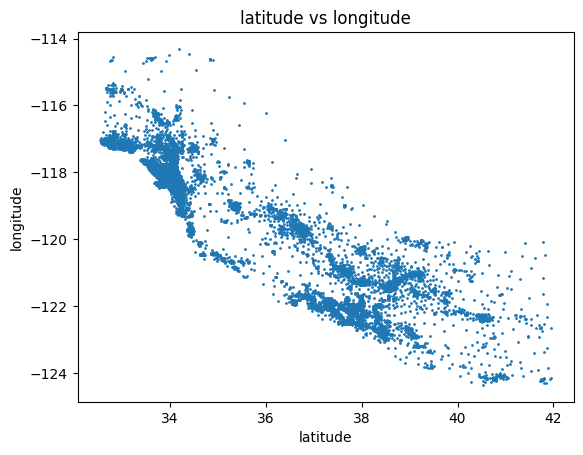

In [ ]:
# Scatter plot function between two columns of a dataframe

def scatter_plot(df, x_column, y_column):
    plt.scatter(df[x_column], df[y_column], s=1)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs {y_column}')
    plt.show()


# Plot scatter plot between latitude and longitude

scatter_plot(df, 'latitude', 'longitude')

In [33]:
# Keep only essential, un-correlated features for the inference model dataset

FEATURES_ARRAY = ['longitude', 'latitude', 'housing_median_age', 'households', 'median_income', 'median_house_value']

# Keep only the specified columns - 5 features and 1 output/target (median_house_value)
df = df[FEATURES_ARRAY]

# Save the dataset to a new CSV file

df.to_csv(DATASET_FOR_MODEL_CSV_FILE_PATH, index=False)


In [34]:
# Load the dataset for the model

df = pd.read_csv(DATASET_FOR_MODEL_CSV_FILE_PATH)

In [35]:
df

,longitude,latitude,housing_median_age,households,median_income,median_house_value
0,-122.23,37.88,41.0,126.0,83252.0,452600.0
1,-122.22,37.86,21.0,1138.0,83014.0,358500.0
2,-122.24,37.85,52.0,177.0,72574.0,352100.0
3,-122.25,37.85,52.0,219.0,56431.0,341300.0
4,-122.25,37.85,52.0,259.0,38462.0,342200.0
...,...,...,...,...,...,...
20421,-121.09,39.48,25.0,330.0,15603.0,78100.0
20422,-121.21,39.49,18.0,114.0,25568.0,77100.0
20423,-121.22,39.43,17.0,433.0,17000.0,92300.0
20424,-121.32,39.43,18.0,349.0,18672.0,84700.0
